# Productivity Prediction
1. What is the business question? 
*       This project aims to predict productivity of workers, Given 15 variables.
2. What each row represent? 
*       Day
3. What is the evaluation method? 
*       Evaluated method is Root-Mean-Squared-Error (RMSE)

# 1.Impprtant Imports

In [1]:
# load data libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split

# data understanding libraries
import seaborn as sns
import matplotlib.pyplot as plt # ploting library
%matplotlib inline

# data prp
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# Modeling
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error
import math

from sklearn.metrics import accuracy_score, confusion_matrix,r2_score

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision',150)
pd.options.display.float_format = '{:,.3f}'.format

# 2.Load Data

In [3]:
df = pd.read_csv("garments_worker_productivity.csv")


# 3-Data Understanding

## 3.1 Desriptive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

> The main takeaways are: 
> - There is 1197 records.
> - There are 15 columns.
> - There is nulls in all 1 column : wip
> - The date column stored as object which is unvalid datatype for date.

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,"1,197.000","1,197.000","1,197.000",691.000,"1,197.000","1,197.000","1,197.000","1,197.000","1,197.000","1,197.000","1,197.000"
mean,6.427,0.730,15.062,"1,190.466","4,567.460",38.211,0.730,0.369,0.150,34.610,0.735
std,3.464,0.098,10.943,"1,837.455","3,348.824",160.183,12.710,3.269,0.428,22.198,0.174
min,1.000,0.070,2.900,7.000,0.000,0.000,0.000,0.000,0.000,2.000,0.234
25%,3.000,0.700,3.940,774.500,"1,440.000",0.000,0.000,0.000,0.000,9.000,0.650
50%,6.000,0.750,15.260,"1,039.000","3,960.000",0.000,0.000,0.000,0.000,34.000,0.773
75%,9.000,0.800,24.260,"1,252.500","6,960.000",50.000,0.000,0.000,0.000,57.000,0.850
max,12.000,0.800,54.560,"23,122.000","25,920.000","3,600.000",300.000,45.000,2.000,89.000,1.120


In [6]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.800,26.160,"1,108.000",7080,98,0.000,0,0,59.000,0.941
1,1/1/2015,Quarter1,finishing,Thursday,1,0.750,3.940,NaN,960,0,0.000,0,0,8.000,0.886
2,1/1/2015,Quarter1,sweing,Thursday,11,0.800,11.410,968.000,3660,50,0.000,0,0,30.500,0.801
3,1/1/2015,Quarter1,sweing,Thursday,12,0.800,11.410,968.000,3660,50,0.000,0,0,30.500,0.801
4,1/1/2015,Quarter1,sweing,Thursday,6,0.800,25.900,"1,170.000",1920,50,0.000,0,0,56.000,0.800
5,1/1/2015,Quarter1,sweing,Thursday,7,0.800,25.900,984.000,6720,38,0.000,0,0,56.000,0.800
6,1/1/2015,Quarter1,finishing,Thursday,2,0.750,3.940,NaN,960,0,0.000,0,0,8.000,0.755
7,1/1/2015,Quarter1,sweing,Thursday,3,0.750,28.080,795.000,6900,45,0.000,0,0,57.500,0.754
8,1/1/2015,Quarter1,sweing,Thursday,2,0.750,19.870,733.000,6000,34,0.000,0,0,55.000,0.753
9,1/1/2015,Quarter1,sweing,Thursday,1,0.750,28.080,681.000,6900,45,0.000,0,0,57.500,0.750


## 3.2 How many departments, teams, and workers are there?


In [7]:
num_depaertments = len(df['department'].unique())
print("There are ",num_depaertments," unique department.")

num_teams = len(df['team'].unique())
print("There are ",num_teams," unique team.")

no_of_workers = len(df['no_of_workers'].unique())
print("There are ",no_of_workers," workers.")


There are  3  unique department.
There are  12  unique team.
There are  61  workers.


## 3.3 What is the histogram plot of numerical columns in the data?


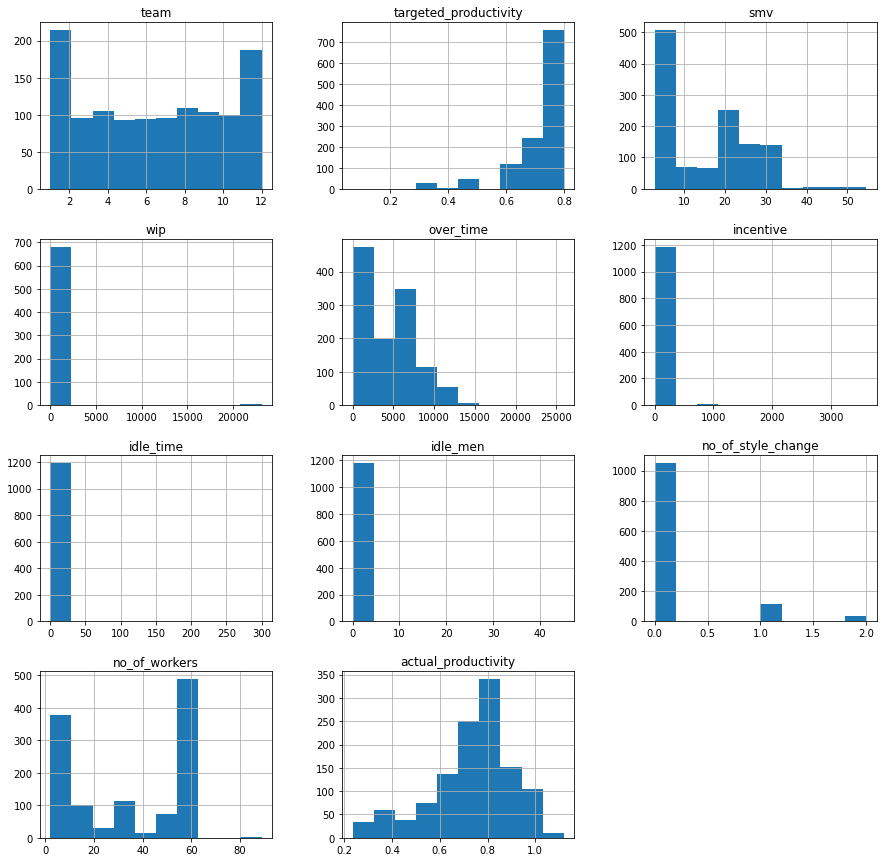

In [8]:
df.hist(figsize= (15,15));


> Insights can be taken from these graphs are that:
>- Most of the data attributes are heavily skewed, both left and right.
>- Actual_productivity has multiple lower outliers, potentially leading to a left skewed.
>- There are outliers in the dataset in coumns : no_of_style_change and targeted_productivity  
>- There is 0 idle time and idle workers for the majority of the time.
>- There is 0 incentive offered for the majority of the time.
>- There are 12 teams working.Team 1 and 2 have the highest number of activities. 
>- Number of workers in a team can vary greatly, with most having around 8 or 58 workers.
>- Targeted productivity is set at 0.8 for the majority of the time.

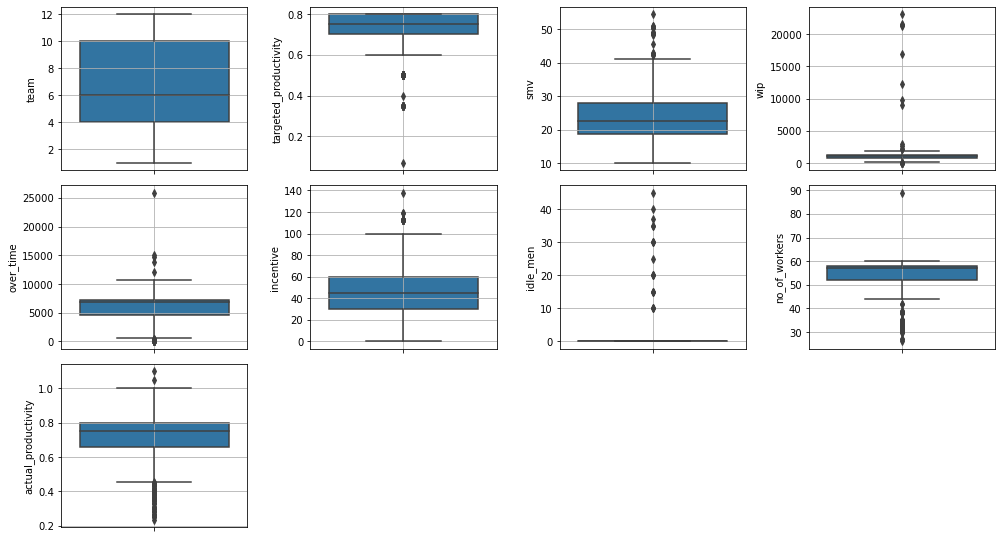

In [9]:
# check outliers 
columns_selected = ['team','targeted_productivity','smv','wip','over_time','incentive','idle_men','no_of_workers','actual_productivity']
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(columns_selected):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=df.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

## 3.4 What is the correlation between attributes in the data?

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000,0.037,-0.112,-0.035,-0.108,-0.017,0.022,0.022,-0.037,-0.124,-0.164
targeted_productivity,0.037,1.000,-0.091,-0.013,-0.072,0.202,-0.059,-0.059,-0.277,-0.048,0.448
smv,-0.112,-0.091,1.000,-0.143,0.700,0.601,0.137,0.137,0.382,0.891,-0.122
wip,-0.035,-0.013,-0.143,1.000,0.137,0.302,-0.193,-0.193,-0.161,-0.059,0.233
over_time,-0.108,-0.072,0.700,0.137,1.000,0.539,-0.018,-0.018,0.110,0.744,-0.076
incentive,-0.017,0.202,0.601,0.302,0.539,1.000,-0.054,-0.054,0.018,0.657,0.217
idle_time,0.022,-0.059,0.137,-0.193,-0.018,-0.054,1.000,1.000,0.144,0.135,-0.148
idle_men,0.022,-0.059,0.137,-0.193,-0.018,-0.054,1.000,1.000,0.144,0.135,-0.148
no_of_style_change,-0.037,-0.277,0.382,-0.161,0.110,0.018,0.144,0.144,1.000,0.338,-0.266
no_of_workers,-0.124,-0.048,0.891,-0.059,0.744,0.657,0.135,0.135,0.338,1.000,-0.035


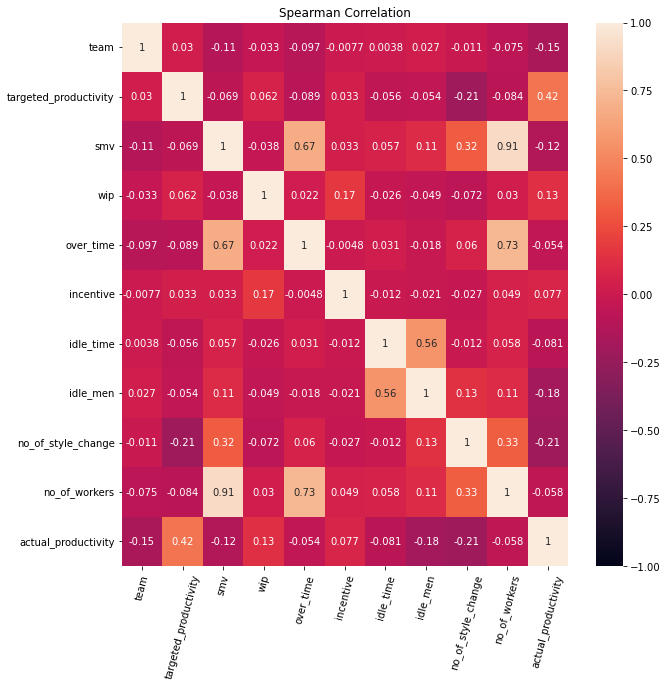

In [10]:
import seaborn as sns
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.xticks(rotation=75)
    plt.title("Spearman Correlation")
    return(r)

display_correlation(df)

>- Most of the attributes are not strongly correlated except few.
>- There is a very strong correlation between svm and no_of_workers.
>- There is a strong correlation between over_time and no_of_workers.
>- There is a moderate correlation between svm and over_time.

## 3.5 What is relationship between actual_productivity and targeted_productivity?

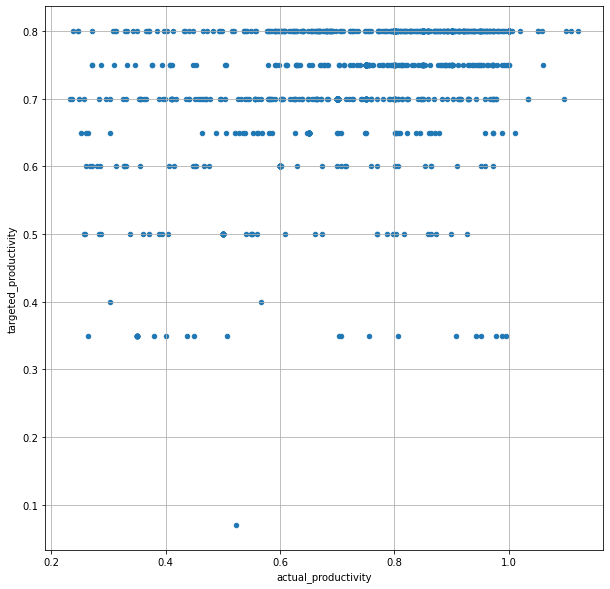

In [11]:
df.plot(x='actual_productivity', y='targeted_productivity', kind='scatter', grid= True, figsize=(10,10));


> Insights are :
>- Targeted productivity value is usually set to 0.8 and it's the hightest value.

## 3.6 What is relationship between incentive and actual_productivity?

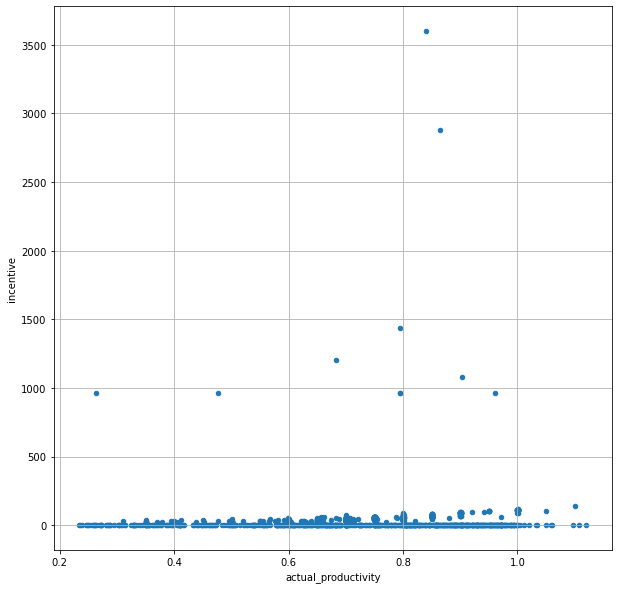

In [12]:
df.plot(x='actual_productivity', y='incentive', kind='scatter', grid= True, figsize=(10,10));


> Incentive is most likely set to 0.

# 4-Data Preparing
 ## In this phase we're cleaning the data from any null values, checking for duplicates to handle if any, and handling any wrong data type.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [14]:
# Let's fill the null values in the wip columns with its mean
mean = df['wip'].mean()
df['wip'].fillna(mean, inplace = True)



In [15]:
# Check it was done 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

>- Now, we don't have null values in the dataset.

**Check if there are duplicates**

In [16]:
sum(df.duplicated())

0

>- There are no duplicates in the dataset.

**Check if there are inproper datatypes: Handeling categorical features**


In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
date_le = LabelEncoder()
quarter_le = LabelEncoder()
department_le = LabelEncoder()                 
day_le = LabelEncoder()

df['date']       = date_le.fit_transform(df.date)
df['quarter']    = quarter_le.fit_transform(df.quarter)
df['department'] = department_le.fit_transform(df.department)
df['day'] = day_le.fit_transform(df.day)

In [19]:
df.dtypes

date                       int64
quarter                    int32
department                 int32
day                        int32
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [20]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.800,26.160,"1,108.000",7080,98,0.000,0,0,59.000,0.941
1,0,0,1,3,1,0.750,3.940,"1,190.466",960,0,0.000,0,0,8.000,0.886
2,0,0,2,3,11,0.800,11.410,968.000,3660,50,0.000,0,0,30.500,0.801
3,0,0,2,3,12,0.800,11.410,968.000,3660,50,0.000,0,0,30.500,0.801
4,0,0,2,3,6,0.800,25.900,"1,170.000",1920,50,0.000,0,0,56.000,0.800


**Now I'll split the data into train and test parts, then will aplly scaling on them**

In [32]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=1)
print("Train set size is ",len(train_data))
print("Test set size is ",len(test_data))

Train set size is  837
Test set size is  360


In [39]:
def scale (train, test, cols):
    transformer = RobustScaler().fit(train[cols])
    train[cols] = transformer.transform(train[cols])
    test[cols] = transformer.transform(test[cols])
    return train, test

In [86]:
prep_columns = ['date','quarter','department','day','team','targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers']
#['date','quarter','department','day','team','targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity']
#['quarter','department','team','targeted_productivity','smv','wip','no_of_style_change','no_of_workers','incentive']
train_preped, test_preped =  scale(train_data, test_data, prep_columns)

c:\Users\mkank\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\mkank\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [68]:
train_preped

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
330,-0.419,0.500,-1.000,-1.000,0.333,0.500,-0.608,0.000,-0.478,-0.460,0.000,0.000,0.000,-0.562,-0.472
786,0.355,0.500,-2.000,-1.000,0.500,0.500,-0.557,0.000,-0.522,-0.460,0.000,0.000,0.000,-0.521,0.911
11,-0.903,-0.500,0.000,0.000,0.667,0.000,0.199,-2.669,0.435,0.440,0.000,0.000,0.000,0.396,-0.330
388,-0.323,1.000,0.000,0.000,0.333,0.500,1.266,-0.917,1.212,0.140,0.000,0.000,0.000,0.448,-1.114
961,0.613,1.000,0.000,0.000,-0.833,-4.000,0.561,-0.115,0.457,0.000,0.000,0.000,2.000,0.417,-1.998
663,0.129,0.000,-2.000,-0.333,0.333,-0.500,-0.547,0.000,-0.413,-0.460,0.000,0.000,0.000,-0.417,0.313
264,-0.516,0.500,0.000,0.000,-0.833,0.500,0.536,-0.133,1.185,1.040,0.000,0.000,0.000,0.500,0.362
705,0.194,0.000,-2.000,0.333,0.333,-4.000,-0.547,0.000,-0.565,-0.460,0.000,0.000,0.000,-0.562,-0.372
56,-0.839,-0.500,0.000,-0.333,0.667,-0.500,0.631,0.050,0.511,0.340,0.000,0.000,0.000,0.469,-0.391
1162,0.935,0.000,0.000,0.333,0.667,0.000,0.323,1.345,0.348,0.220,0.000,0.000,0.000,0.312,-0.138


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.800,26.160,"1,108.000",7080,98,0.000,0,0,59.000,0.941
1,0,0,1,3,1,0.750,3.940,"1,190.466",960,0,0.000,0,0,8.000,0.886
2,0,0,2,3,11,0.800,11.410,968.000,3660,50,0.000,0,0,30.500,0.801
3,0,0,2,3,12,0.800,11.410,968.000,3660,50,0.000,0,0,30.500,0.801
4,0,0,2,3,6,0.800,25.900,"1,170.000",1920,50,0.000,0,0,56.000,0.800
5,0,0,2,3,7,0.800,25.900,984.000,6720,38,0.000,0,0,56.000,0.800
6,0,0,1,3,2,0.750,3.940,"1,190.466",960,0,0.000,0,0,8.000,0.755
7,0,0,2,3,3,0.750,28.080,795.000,6900,45,0.000,0,0,57.500,0.754
8,0,0,2,3,2,0.750,19.870,733.000,6000,34,0.000,0,0,55.000,0.753
9,0,0,2,3,1,0.750,28.080,681.000,6900,45,0.000,0,0,57.500,0.750


> Data preperation is done:
>- Null values are handeled.
>- Duplicates checked.
>- Catergorical datatypes handeled.
>- Scaling is done.

# 5.Model: Linear Regression

In [87]:
# Features
X =  ['date','quarter','department','day','team','targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers']
# Target
y = 'actual_productivity'

# select columns
train_X = train_preped[X]
train_y = train_preped[y]
test_X = test_preped[X]
test_y = test_preped[y]

In [88]:
# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(train_X, train_y)

# Predictions
predictions = model.predict(test_X)

# 6.Evaluation 

In [89]:
print('MSE = ', mean_squared_error(test_y, predictions))
print('RMSE = ', math.sqrt(mean_squared_error(test_y, predictions)))


MSE =  0.6508858884677584
RMSE =  0.8067749924655315


In [90]:
#Accuracy and MSE
print(f'R2 score is {r2_score(predictions,test_y)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions- test_y) ** 2))

R2 score is -1.8549406125124843
Residual sum of squares (MSE): 0.65


In [91]:
print("Accuracy : ", model.score(test_X, test_y)*100,"%")

Accuracy :  17.760369058605253 %


In [94]:
prediction_train_linear = model.predict(train_X)
print("MSE over training : ",mean_squared_error(train_y, prediction_train_linear) )


MSE over training :  0.5015423323906083


In [95]:
prediction_test_linear = model.predict(test_X)
print('MSE over test :', mean_squared_error(test_y, prediction_test_linear) )


MSE over test : 0.6508858884677584
